In [3]:
import numpy as np
import pandas as pd
from plotting import plot_tree, plot_2D_labeled_clusters, plot_multiple_2D_labeled_clusters

rp_datapath = './../data/rp.data'
rp_data = pd.read_csv(rp_datapath, header=None, sep=',')
rp_data.drop(columns=[0], inplace=True)
rp_data.head()

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [4]:
rp_data[10]//=2
rp_data[10]-=1

rp_data[10].value_counts()

10
0    444
1    239
Name: count, dtype: int64

In [5]:
data = rp_data.copy()

data.drop(columns=[10], inplace=True)

data.head()

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


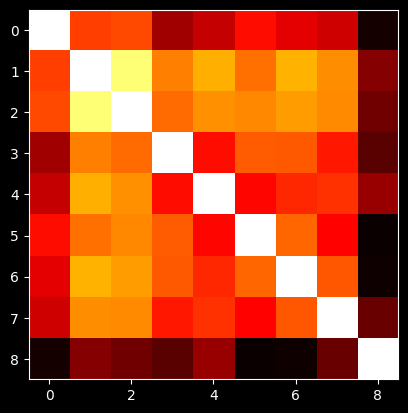

In [6]:
import matplotlib.pyplot as plt

data_normalized = (data - data.mean()) / data.std()
cov_matrix = np.cov(data_normalized.T)

plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')

In [7]:
data = data.to_numpy()

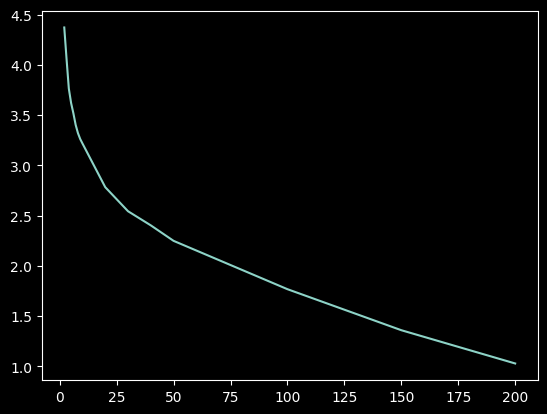

In [8]:
from kmeans import nkmeanspp
from numerics import classification_impurity

ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100, 150, 200]

impurities = []


for k in ks:
    centers, labels = nkmeanspp(data, k)
    impurities.append(classification_impurity(data, labels))
    
plt.plot(ks, impurities)

/home/ts/tcs/mpum/miniproj4/Clustering/src/kmeans.py:14: RuntimeWarning: Mean of empty slice.
  new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
/home/ts/.local/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


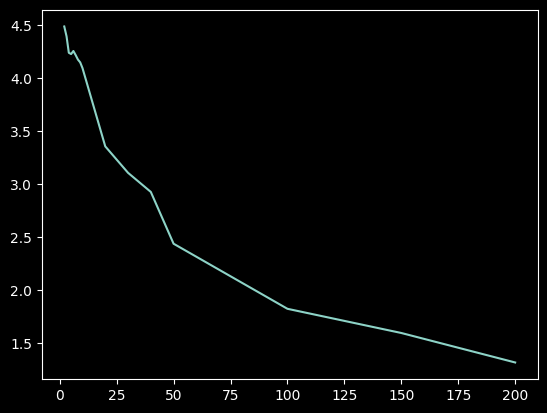

In [9]:
from spectral import spectral_clustering

impurities = []

for k in ks:
    centers, labels = spectral_clustering(data, k)
    impurities.append(classification_impurity(data, labels))
    
plt.plot(ks, impurities)

In [14]:
import networkx as nx

def gen_G(padre):
    G = nx.DiGraph()

    for i, p in enumerate(padre):
        if p != -1:
            G.add_edge(p, i)
        else:
            root = i
            
    return G

In [13]:
from hierarhical import merging_avg_coefs, merging_centroid_coefs, merging_complete_coefs, merging_single_coefs, merging_ward_coefs
from hierarhical import hierarchical_lance_williams

padress = {}
labelss = {}

coefs = {
    'single': merging_single_coefs,
    'centroid': merging_centroid_coefs,
    'avg': merging_avg_coefs,
    'complete': merging_complete_coefs,
    'ward': merging_ward_coefs
}


for i, c in enumerate(coefs.items()):
    coef_name, coef = c
    impurities = []
    labels, padre = hierarchical_lance_williams(data, 1, merging_coefs=coef)
    padress[coef_name] = padre
    labelss[coef_name] = labels
    

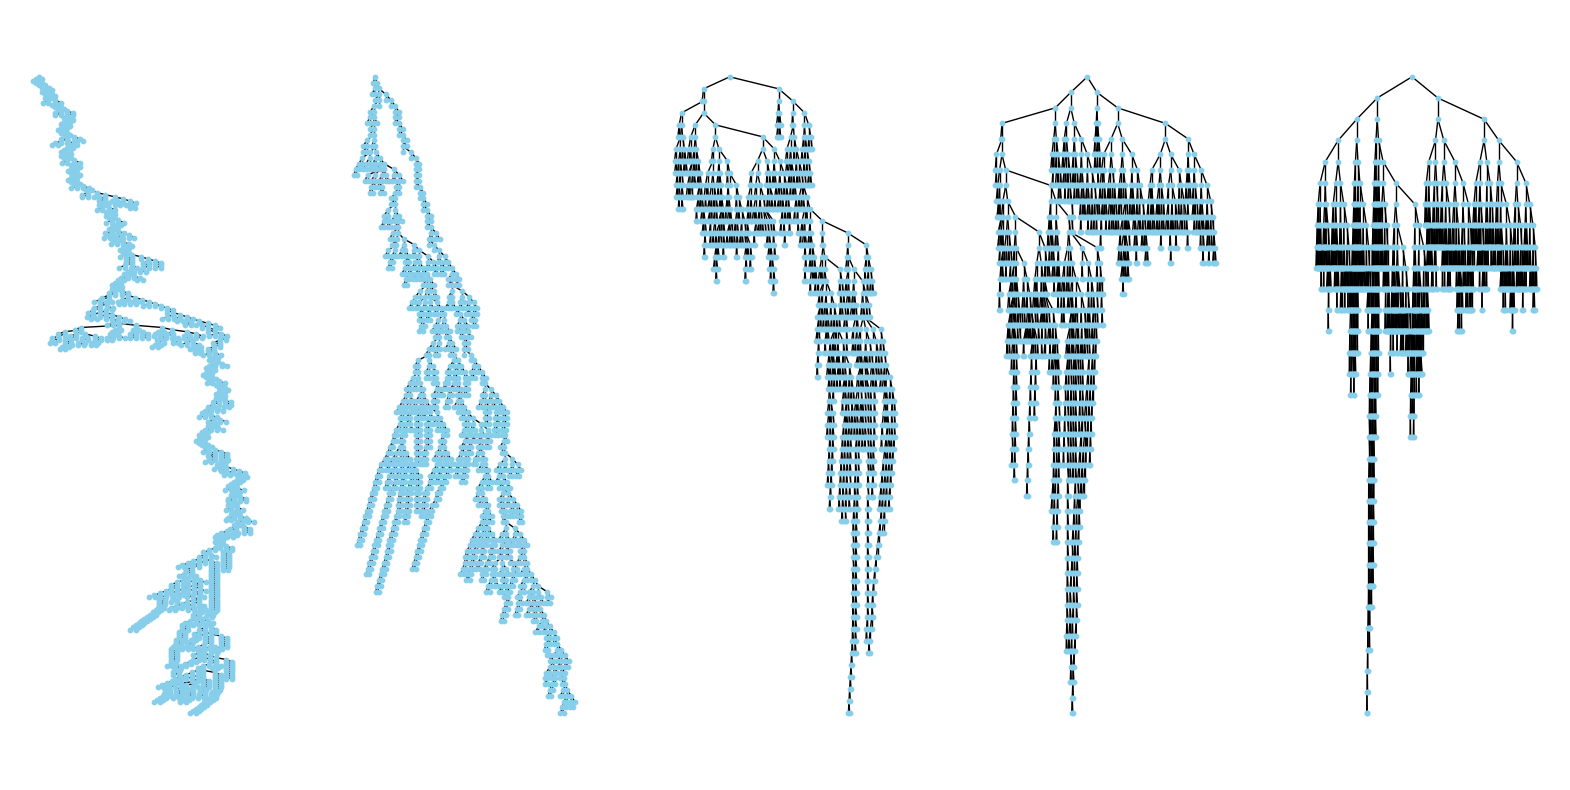

In [15]:
ax, fig = plt.subplots(1, 5, figsize=(20, 10))

for i, c in enumerate(coefs.items()):
    #draw tree
    coef_name, coef = c
    G = gen_G(padress[coef_name])
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
    nx.draw(G, pos, with_labels=False, arrows=False, node_size=10, node_color='skyblue', font_size=10, font_weight='bold', ax=fig[i])